In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/content/LoanExport.csv')
df.head()

<ipython-input-2-ef38706b50cf>:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/LoanExport.csv')


,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [3]:
df.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [4]:
df.isna().sum()

,0
CreditScore,0
FirstPaymentDate,0
FirstTimeHomebuyer,0
MaturityDate,0
MSA,0
MIP,0
Units,0
Occupancy,0
OCLTV,0
DTI,0


In [5]:
df.drop(columns=['SellerName'],inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [7]:
print(df['PostalCode'].unique)

<bound method Series.unique of 0         60400
1         80200
2         66000
3         90700
4          7600
          ...  
291446    19400
291447    11600
291448    92800
291449    19300
291450    18900
Name: PostalCode, Length: 291451, dtype: object>


In [8]:
df.isna().sum().sort_values(ascending=False)

,0
CreditScore,0
PPM,0
MonthsDelinquent,0
EverDelinquent,0
ServicerName,0
NumBorrowers,0
OrigLoanTerm,0
LoanPurpose,0
LoanSeqNum,0
PostalCode,0


In [9]:
df.shape

(291451, 27)

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


object_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


for col in object_columns:
    df[col] = df[col].apply(lambda x: le.fit_transform([x])[0] if isinstance(x, str) else x)



In [11]:
df.head(100)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,0,202901,0,25,1,0,89,27,...,0,0,0,0,360,0,0,0,0,52
1,0,199902,0,202901,0,0,1,0,73,17,...,0,0,0,0,360,0,0,0,0,144
2,0,199902,0,202901,0,0,1,0,75,16,...,0,0,0,0,360,0,0,0,0,67
3,0,199902,0,202901,0,0,1,0,76,14,...,0,0,0,0,360,0,0,0,0,35
4,0,199902,0,202901,0,0,1,0,78,18,...,0,0,0,0,360,0,0,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,199903,0,202902,0,0,1,0,80,39,...,0,0,0,0,360,0,0,0,0,39
96,0,199903,0,202902,0,0,1,0,78,28,...,0,0,0,0,360,0,0,0,0,47
97,0,199903,0,202902,0,25,1,0,90,35,...,0,0,0,0,360,0,0,0,0,55
98,0,199903,0,202902,0,0,1,0,70,28,...,0,0,0,0,360,0,0,0,0,212


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  int64  
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  int64  
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  int64  
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  int64  
 14  PPM                 291451 non-null  int64  
 15  ProductType         291451 non-nul

In [13]:
df.corr()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
CreditScore,1.000000,0.011249,NaN,0.001346,NaN,-0.164376,0.002808,NaN,-0.190848,-0.098740,...,NaN,-0.113206,NaN,NaN,-0.008075,NaN,NaN,-0.207204,-0.150266,-0.005127
FirstPaymentDate,0.011249,1.000000,NaN,0.142768,NaN,-0.020830,-0.003539,NaN,-0.025962,-0.001190,...,NaN,-0.012721,NaN,NaN,-0.605893,NaN,NaN,-0.011898,-0.002257,-0.025434
FirstTimeHomebuyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaturityDate,0.001346,0.142768,NaN,1.000000,NaN,-0.002338,0.003166,NaN,-0.001901,0.035039,...,NaN,0.002184,NaN,NaN,0.682230,NaN,NaN,0.001860,0.005761,-0.002989
MSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIP,-0.164376,-0.020830,NaN,-0.002338,NaN,1.000000,-0.042111,NaN,0.694789,0.111603,...,NaN,0.036794,NaN,NaN,0.014834,NaN,NaN,0.059993,0.051204,-0.087802
Units,0.002808,-0.003539,NaN,0.003166,NaN,-0.042111,1.000000,NaN,-0.046133,0.012887,...,NaN,-0.015432,NaN,NaN,0.005348,NaN,NaN,0.010163,-0.004573,0.025594
Occupancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCLTV,-0.190848,-0.025962,NaN,-0.001901,NaN,0.694789,-0.046133,NaN,1.000000,0.114853,...,NaN,0.054872,NaN,NaN,0.018560,NaN,NaN,0.065528,0.059811,-0.094299
DTI,-0.098740,-0.001190,NaN,0.035039,NaN,0.111603,0.012887,NaN,0.114853,1.000000,...,NaN,0.064860,NaN,NaN,0.028005,NaN,NaN,0.062109,0.040830,-0.007732


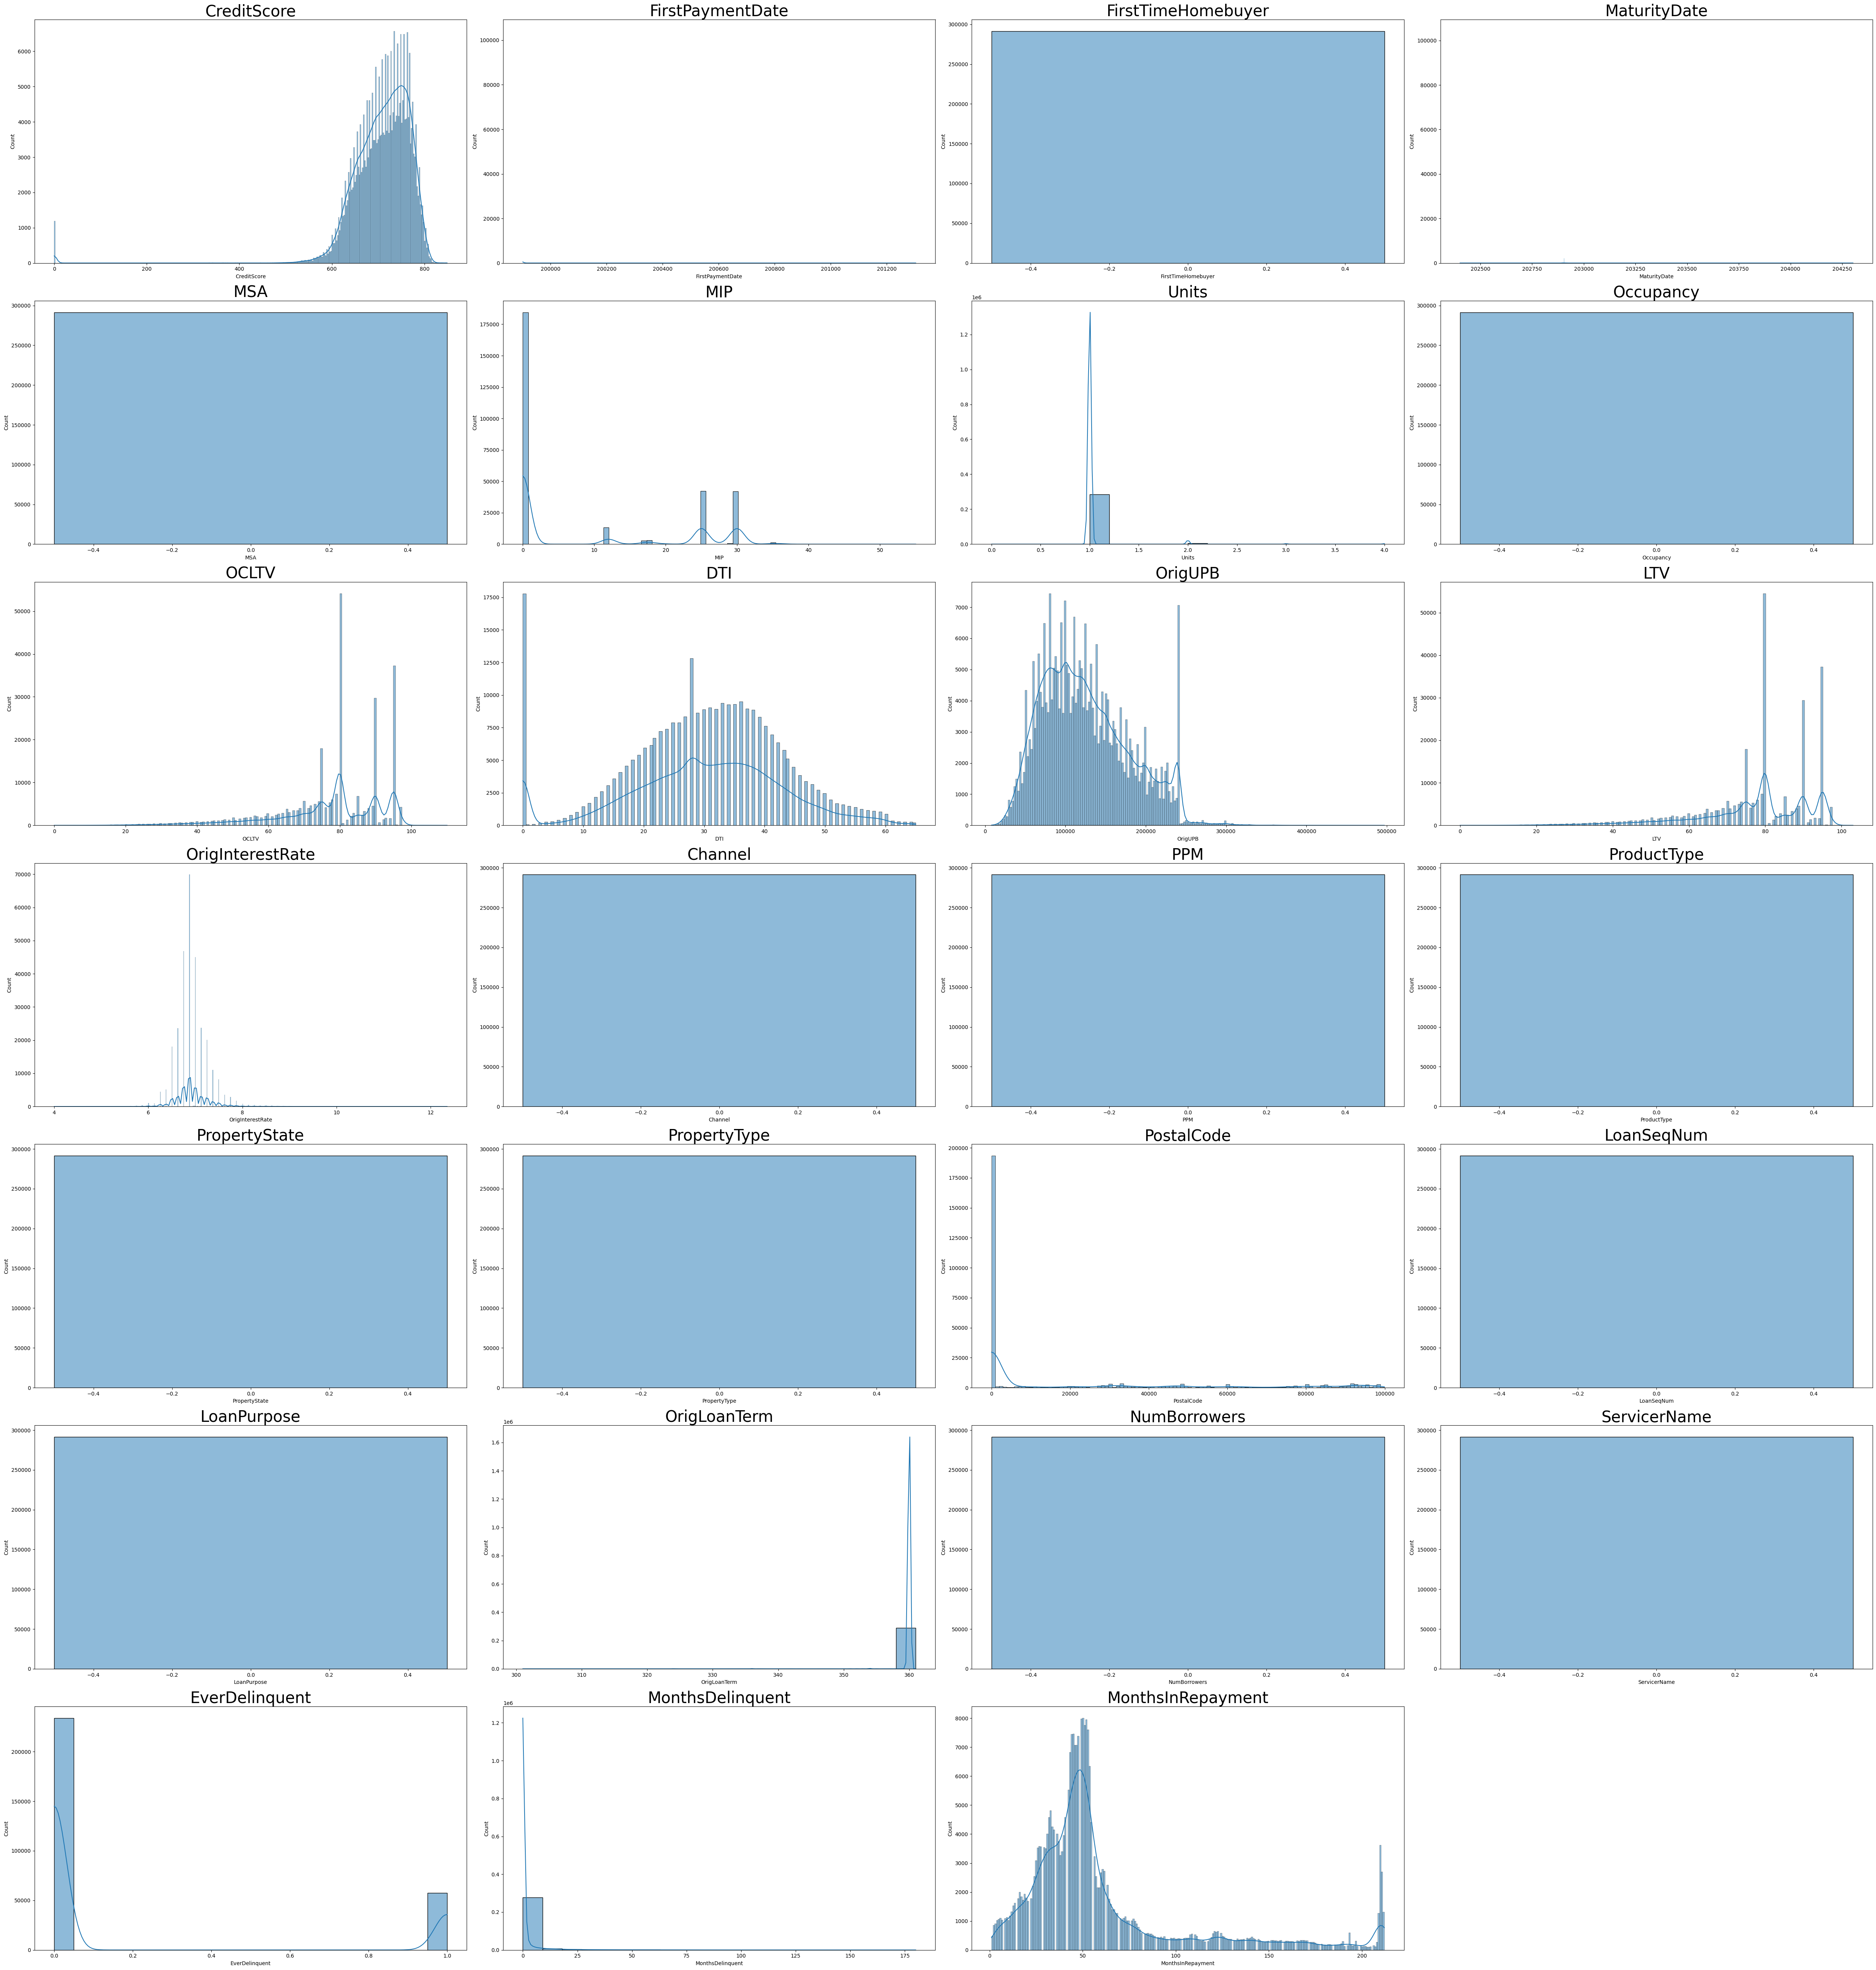

In [14]:
num_features = len(df.columns)
num_rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)

fig, axs = plt.subplots(num_rows, 4, figsize=(50, num_rows * 7.5))
count = 0
cols = df.columns.to_list()

for i in range(num_rows):
    for j in range(4):
        if count < num_features:
            sns.histplot(df[cols[count]], ax=axs[i, j], kde=True)
            axs[i, j].set_title(cols[count], fontsize=30)
            count += 1
        else:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats

In [16]:
X = df.drop(columns=['EverDelinquent']).values
y = df['EverDelinquent'].values
sc=StandardScaler()
X=sc.fit_transform(X)
# y=sc.fit_transform(y.reshape(-1,1))
# y=y.reshape(-1)


In [17]:
from ssl import DefaultVerifyPaths
corr_matrix=df.corr()
corr = np.array(corr_matrix)[24]
cols= df.columns
columns_to_drop = []

for i in range(len(cols)):
    print(cols[i], "-->", np.round(corr[i], 3))
    if np.isnan(corr[i]) :
        columns_to_drop.append(cols[i])

df.drop(columns_to_drop, axis=1, inplace=True)
X = df.drop(columns=['EverDelinquent']).values


CreditScore --> -0.207
FirstPaymentDate --> -0.012
FirstTimeHomebuyer --> nan
MaturityDate --> 0.002
MSA --> nan
MIP --> 0.06
Units --> 0.01
Occupancy --> nan
OCLTV --> 0.066
DTI --> 0.062
OrigUPB --> -0.068
LTV --> 0.066
OrigInterestRate --> 0.06
Channel --> nan
PPM --> nan
ProductType --> nan
PropertyState --> nan
PropertyType --> nan
PostalCode --> 0.039
LoanSeqNum --> nan
LoanPurpose --> nan
OrigLoanTerm --> 0.01
NumBorrowers --> nan
ServicerName --> nan
EverDelinquent --> 1.0
MonthsDelinquent --> 0.42
MonthsInRepayment --> 0.232


In [18]:
print(df.columns)

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PostalCode',
       'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')


In [19]:
y = df['EverDelinquent'].values


In [20]:
len(df.columns)

15

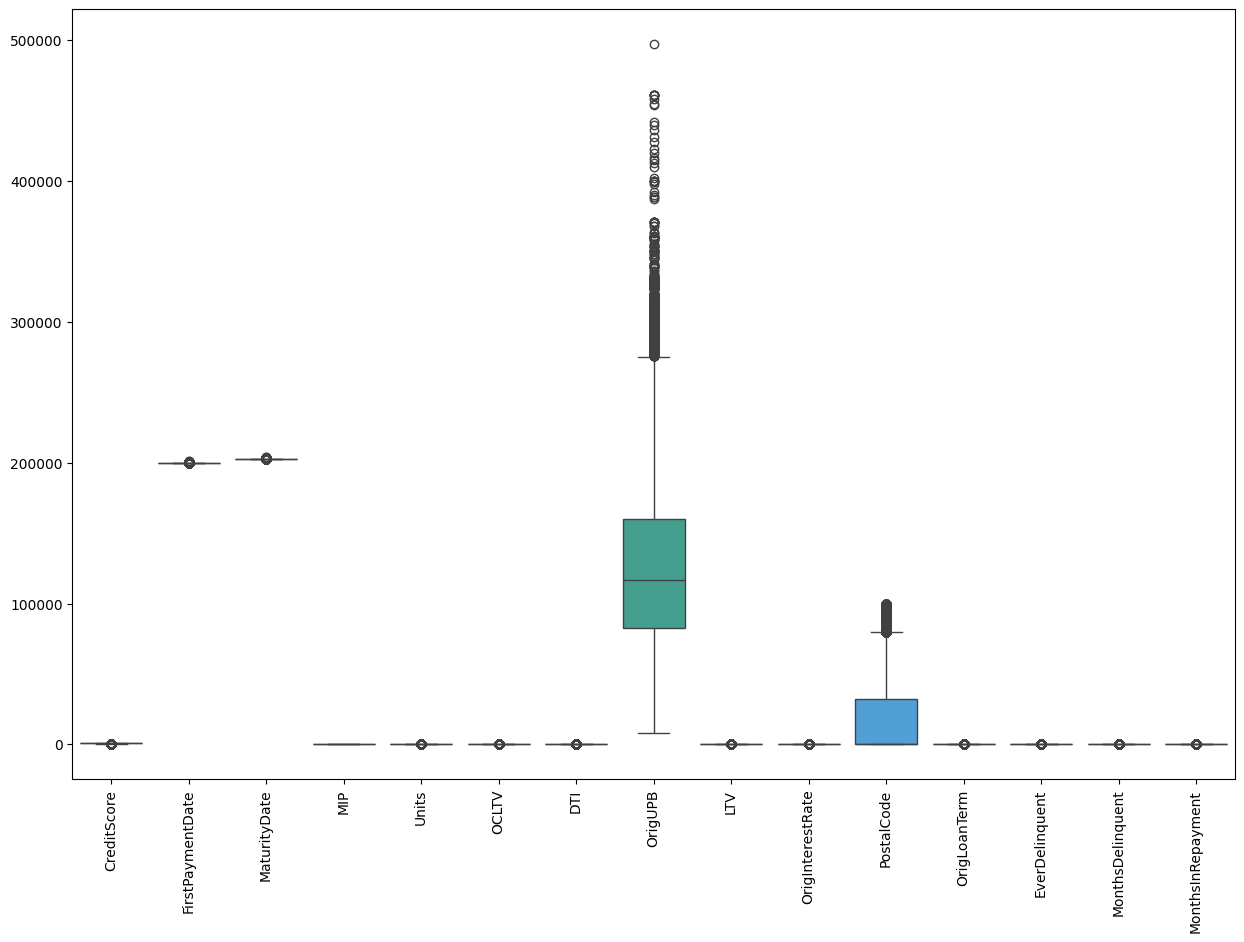

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
df['OrigUPB'] = np.log(df['OrigUPB'])


In [23]:
import pandas as pd

def remove_outliers_iqr(df):
    df = pd.DataFrame(df)

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[~((df < lower_bound.values) | (df > upper_bound.values)).any(axis=1)]

df = remove_outliers_iqr(df)


In [24]:
df.shape

(168125, 15)

In [25]:
print(df.columns)

Index(['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units',
       'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'PostalCode',
       'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent',
       'MonthsInRepayment'],
      dtype='object')


In [26]:
df = df.dropna(subset=['EverDelinquent'])


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=33)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    logistic_regressor = LogisticRegression(max_iter=1000).fit(X_train, y_train)

    y_pred = logistic_regressor.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)



print("Metrics for Classification using Logistic Regression:")
print(f"Accuracy: {np.mean(accuracy_scores)}")
print(f"Precision: {np.mean(precision_scores)}")
print(f"Recall: {np.mean(recall_scores)}")
print(f"F1-score: {np.mean(f1_scores)}")




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Classification using Logistic Regression:
Accuracy: 0.905035820835836
Precision: 0.7897046815429575
Recall: 0.5732705547751591
F1-score: 0.6170082491747921


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=33)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    random_forest = RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
    ).fit(X_train, y_train)

    y_pred = random_forest.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print("Metrics for Classification using Random Forest:")
print(f"Accuracy: {np.mean(accuracy_scores)}")
print(f"Precision: {np.mean(precision_scores)}")
print(f"Recall: {np.mean(recall_scores)}")
print(f"F1-score: {np.mean(f1_scores)}")



Metrics for Classification using Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

kf = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=33)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_model = SVC(
        C=1.0,
        kernel='rbf',
        gamma='scale',
        random_state=33
    ).fit(X_train, y_train)

    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

print("Metrics for Classification using SVM:")
print(f"Accuracy: {np.mean(accuracy_scores)}")
print(f"Precision: {np.mean(precision_scores)}")
print(f"Recall: {np.mean(recall_scores)}")
print(f"F1-score: {np.mean(f1_scores)}")
